<a href="https://colab.research.google.com/github/diegochaux/PARCIAL2/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

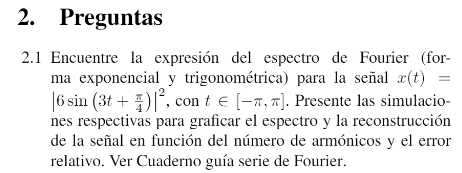

wo= 1.0
Fo= 1.5707963267948966


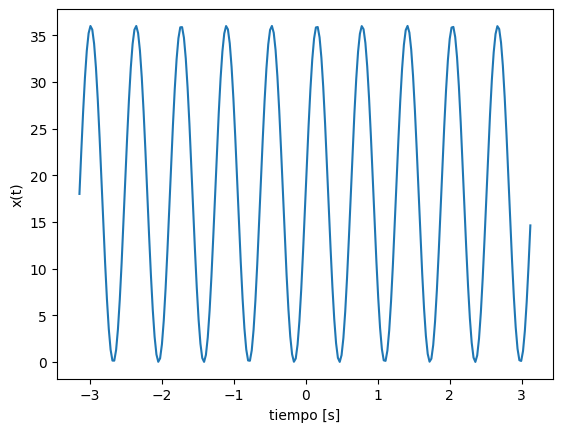

In [97]:
import numpy as np
import matplotlib.pyplot as plt

ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 25*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo

#x = abs(6*np.sin(3*tv+1/4*np.pi))**2 #señal de entrada
x=abs(18+18*np.sin(10*tv))
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()

In [98]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 20 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [99]:
# graficar bases
from ipywidgets import interact,IntSlider

def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{Φn(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("Φn(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{Φn(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

In [100]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = 18 # nivel dc C_0
cn[N-6] = +9j #armónico +9j
cn[N+6] = -9j #armónico -9j

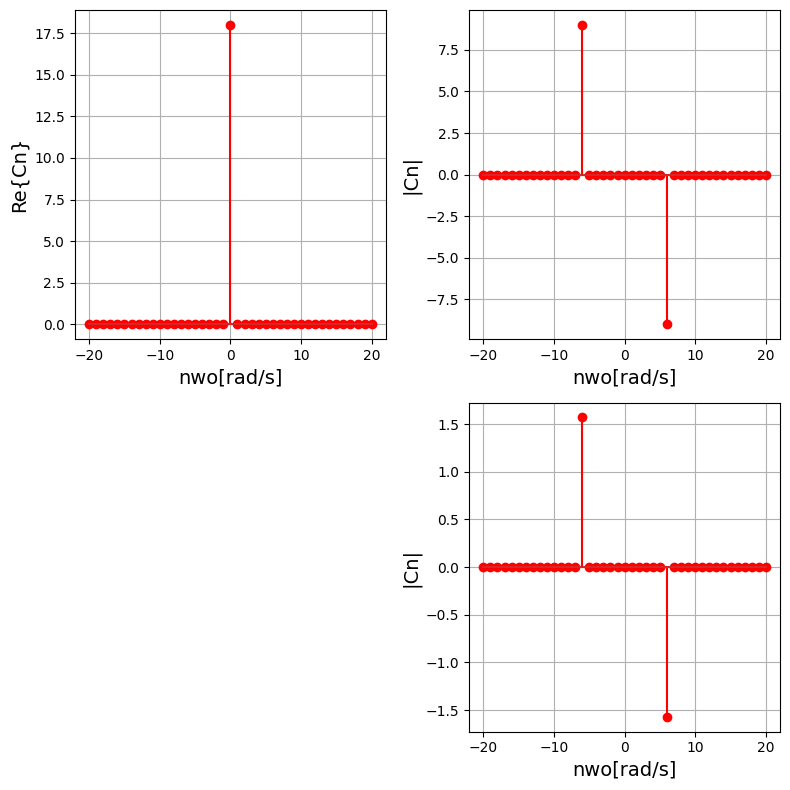

In [101]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'nwo[rad/s]',fontsize = 14)
plt.ylabel(r'Re{Cn}',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'nwo[rad/s]',fontsize = 14)
plt.ylabel(r'|Cn|',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
fig.tight_layout()
plt.xlabel(r'nwo[rad/s]',fontsize = 14)
plt.ylabel(r'|Cn|',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [102]:
#graficar reconstrucción

Px = 486 # potencia señal x(t)
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='Xc(t)') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='X(t)') #señal original
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(1,N,1))


interactive(children=(IntSlider(value=1, description='Na', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

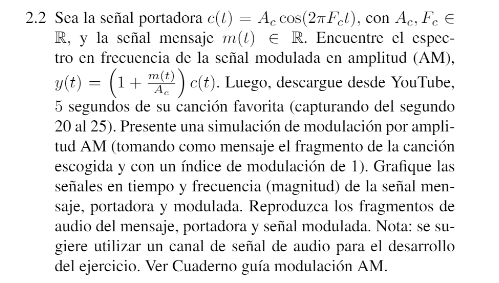

In [103]:
# Para graficar
%matplotlib inline
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [104]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz #se utiliza para instalar desde el repositorio de github y "yt_dpl" se utiliza para descargar contenido de sitios de streaming en línea como YouTube.

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-12.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (139 kB)
  Using cached idna-3.4-py3-none-a

In [105]:
link="https://www.youtube.com/watch?v=dzsuE5ugxf4" #link de yotube de la canción
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}  #se utiliza para extraer el audio del video del link de youtube

[youtube] Extracting URL: https://www.youtube.com/watch?v=dzsuE5ugxf4
[youtube] dzsuE5ugxf4: Downloading webpage
[youtube] dzsuE5ugxf4: Downloading ios player API JSON
[youtube] dzsuE5ugxf4: Downloading android player API JSON
[youtube] dzsuE5ugxf4: Downloading m3u8 information
[info] dzsuE5ugxf4: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    3.27MiB in 00:00:00 at 46.81MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)


In [106]:
!ffmpeg -y -i audio.mp3 output.wav  #para pasar el archivo de formato mp3 a .wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [107]:
!pip install soundfile #instala soundfile en el entorno de python, para manipular audios más fácil

In [108]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [109]:
xpro = x.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [110]:
from IPython.display import Audio #librería para reproducir audio

#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

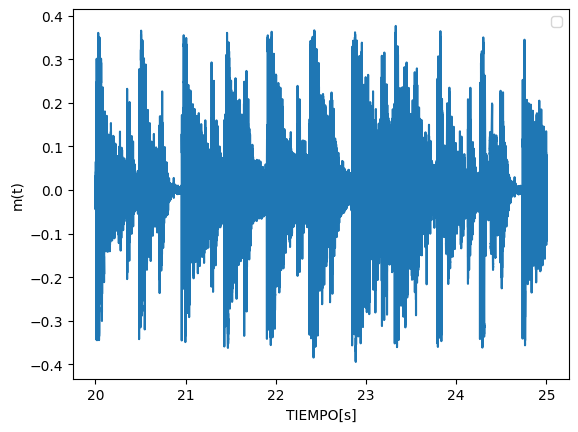

In [111]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('TIEMPO[s]')
plt.ylabel('m(t)')
plt.legend()
plt.show()


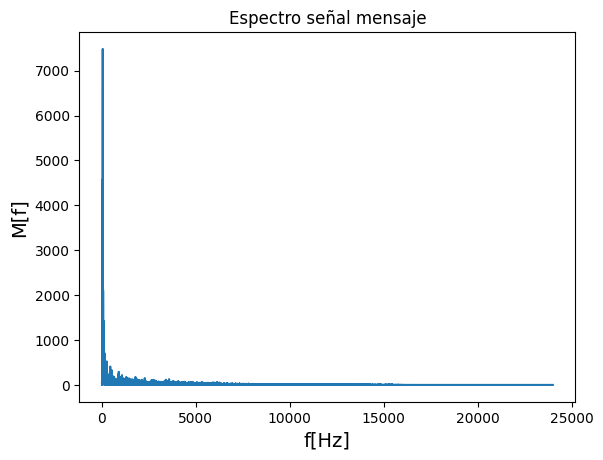

In [112]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'f[Hz]',fontsize = 14)
plt.ylabel(r'M[f]',fontsize = 14)
plt.show()


In [113]:
Fc = 15000 #frecuencia portadora
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*tt) #portadora

In [114]:
#repoducir portadora
Audio(c,rate=fs)

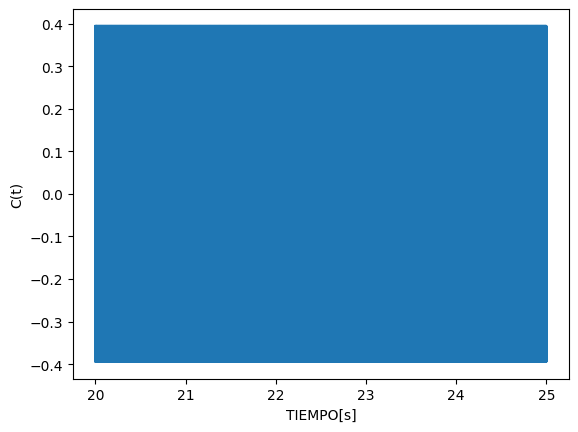

In [115]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('TIEMPO[s]')
plt.ylabel('C(t)')
plt.show()

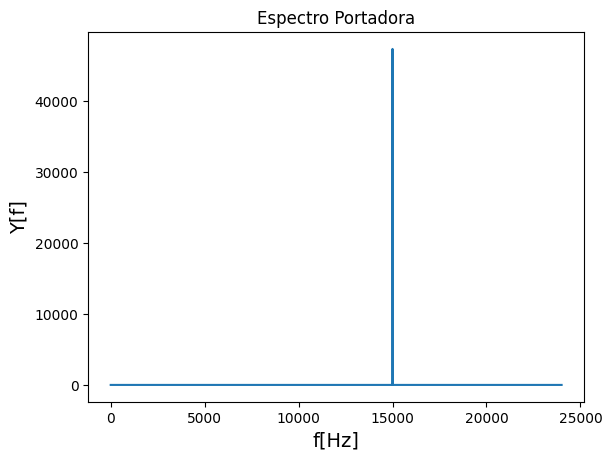

In [116]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'f[Hz]',fontsize = 14)
plt.ylabel(r'Y[f]',fontsize = 14)
plt.show()


In [117]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM


In [118]:
#repoducir modulada
Audio(y,rate=fs)

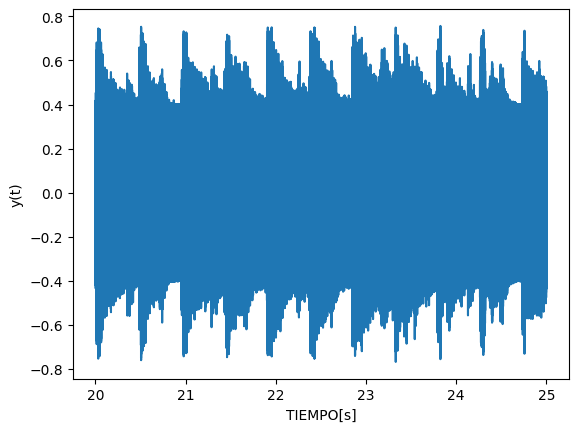

In [119]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('TIEMPO[s]')
plt.ylabel('y(t)')
plt.show()

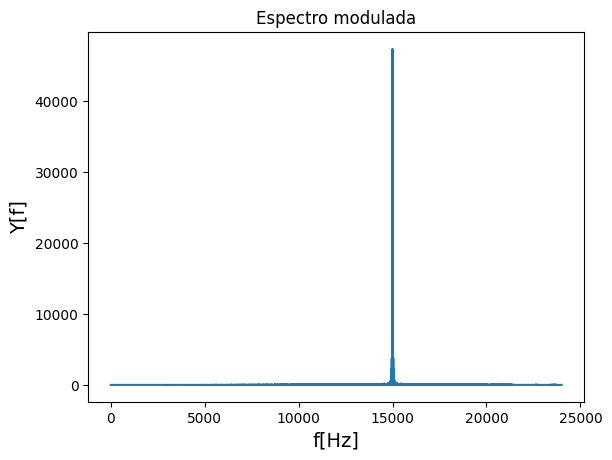

In [120]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'f[Hz]',fontsize = 14)
plt.ylabel(r'Y[f]',fontsize = 14)
plt.show()